In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import skimage.io as sk
from Functions import image_processing as ip
from Functions import seeded_region_growing as srg
from Functions import unseeded_region_growing as urg
from Functions import seed_detection as sd
from Functions import region_merging as rm
from Functions import dice_score as ds
from Functions import segmentation as seg
from PIL import Image




## Challenges

### Blurs in third data set

Another Challenge we had to face is, that some images of the third data set contained blurs, that are
significantly different from the background and are therefore registered as own regions. We fixed
this by adjusting the threshold for the merging by size, to merge these smaller spots to the
background.

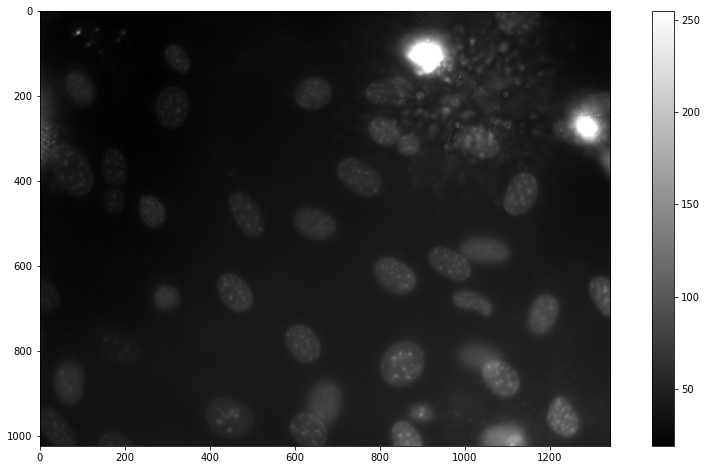

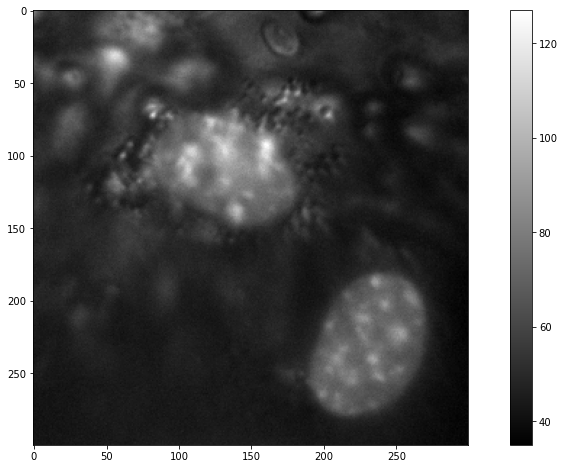

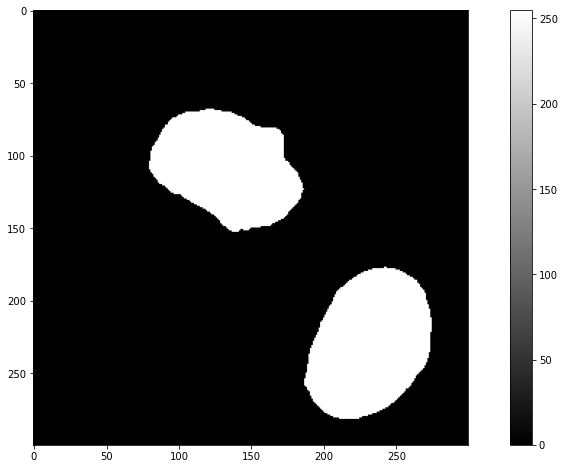

In [30]:
image = sk.imread("../Data/NIH3T3/img/dna-33.png")
ip.show_image(image, 15, 8)
image_small = image[200:500, 900:1200]
ip.show_image(image_small, 15, 8)

ground_truth = sk.imread("../Data/NIH3T3/gt/33.png")
ground_truth_small = ground_truth[200:500, 900:1200]
ip.show_image(ground_truth_small, 15, 8)

0.47244094488188976


C:\Users\L\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / (img[p] + 0.000001))


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137.]


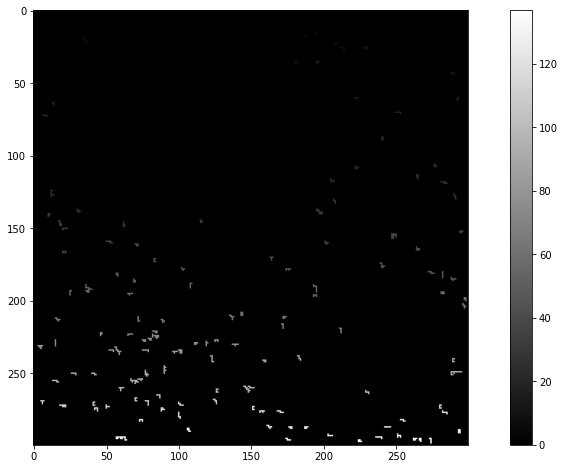

In [45]:
seeds_image_small = sd.seeds(image_small, 0.7)
seeds_image_small = sd.seed_merging(seeds_image_small)
seeds_image_small = sd.reduce_region_number(seeds_image_small, 5)
ip.show_image(seeds_image_small, 15, 8)

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000


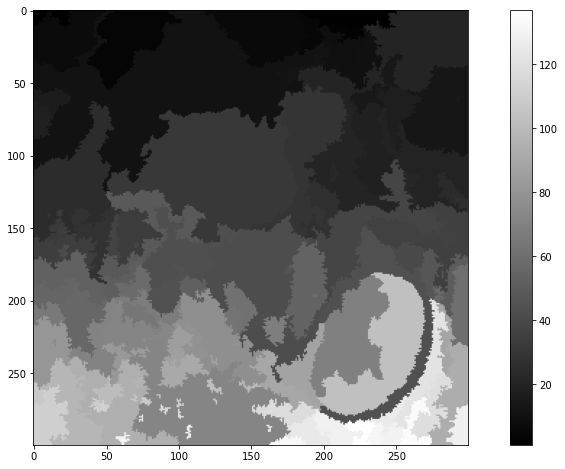

In [46]:
srg_image_small = srg.region_growing(image_small, seeds_image_small)
ip.show_image(srg_image_small, 15, 8)

In [47]:
srg_image_small_save = Image.fromarray(srg_image_small.copy())
srg_image_small_save.save("../Result_Pictures/Unseeded_Region_Growing/NIH3T3/dna-33_5_blurs.tif")

137.0
126
100


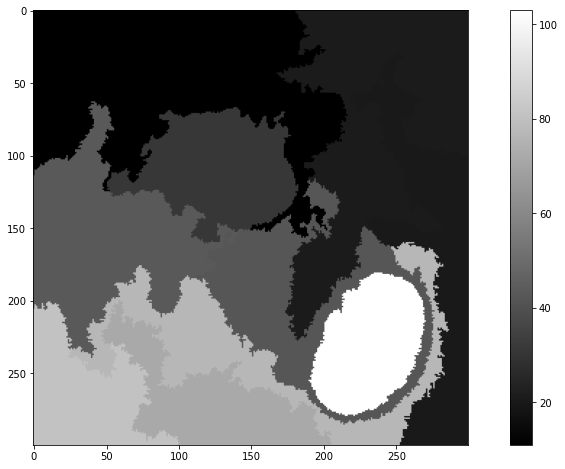

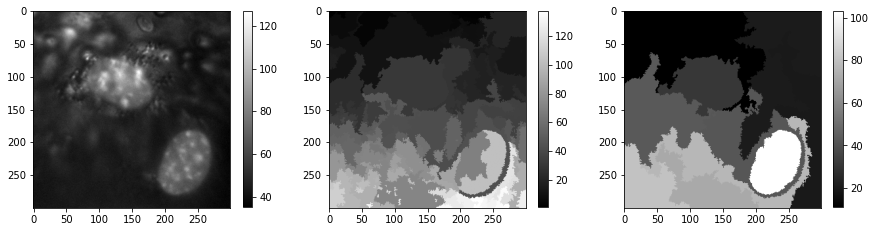

In [83]:
merged_image_small = rm.region_merging(srg_image_small.copy(), image_small, 0.001, 5000)
ip.show_image(merged_image_small, 15, 8)

ip.show_three_images_colorbar(image_small, srg_image_small, merged_image_small, 0.45)

### Cells at the border of the image

In the ground truth images cells that were only partly shown in the images were not present in the
ground truth images. We decided against removing these only partly shown cells, as we thought they
should be found by the algorithm. This had a small impact on our dice score, which varies for
different images, as a different amount of cells is only partly shown.


In [66]:
# Result Picture einlesen
ground_truth_hela = sk.imread("../Data/N2DL-HeLa/gt/man_seg13.tif")
# Kleineren Ausschnitt erstellen
# Dice score alt und neu berechnen



## Results

### Impact of gaussian filter on region growing

In this test, the influence of the usage of a gaussian filter before region growing was investigated.


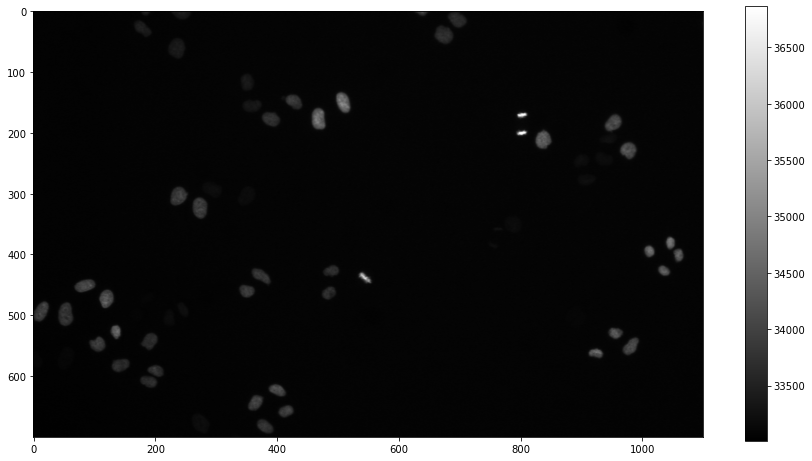

In [67]:
image_hela = sk.imread("../Data/N2DL-HeLa/img/t13.tif")
ip.show_image(image_hela, 15, 8)

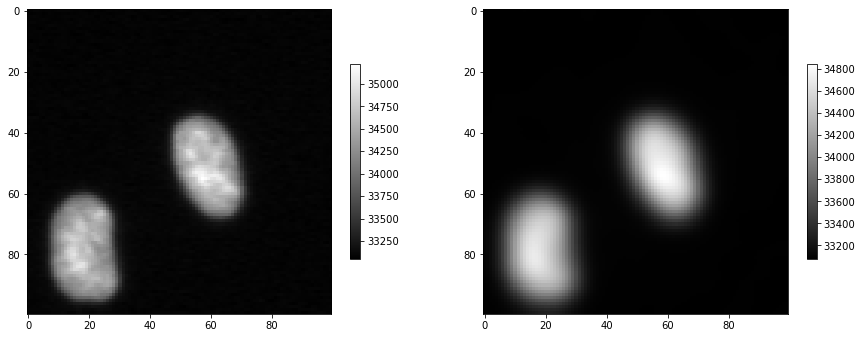

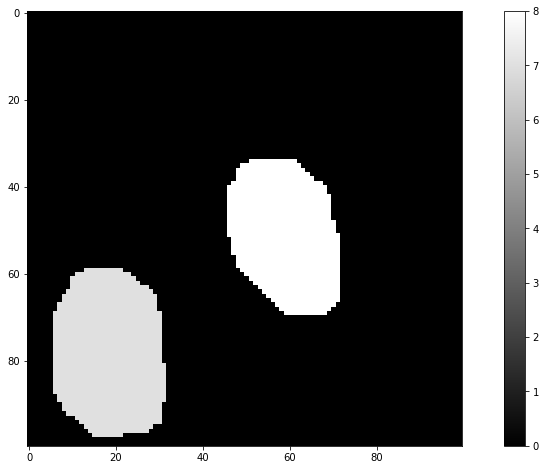

In [77]:
image_hela_small = image_hela[100:200, 450:550]
gaussian_hela = ip.gaussian_filter(image_hela_small, 3)
ip.show_two_images_colorbar(image_hela_small, gaussian_hela, 0.45)
ground_truth_hela_small = ground_truth_hela[100:200, 450:550]
ip.show_image(ground_truth_hela_small, 15, 8)

5000
32
4
5000
26
5


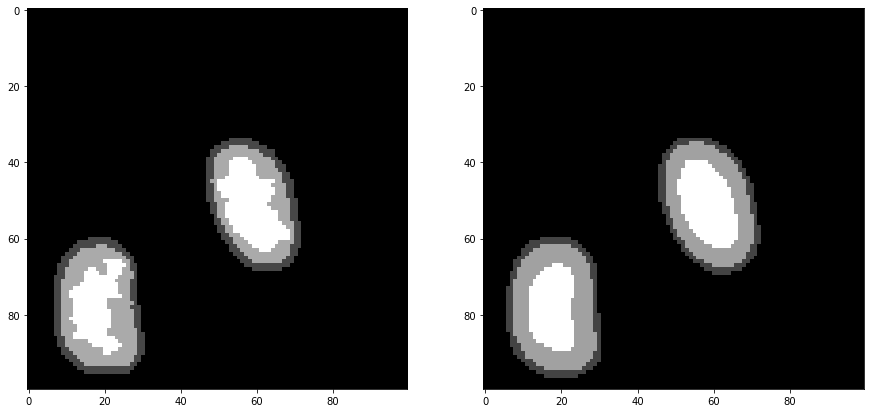

0.9576702953414044
0.9886


In [81]:
urg_hela_small = urg.unseeded_region_growing_algorithm(image_hela_small, (0,0), 50)
urg_hela_small = rm.region_merging(urg_hela_small, image_hela_small, 0.01, 300)
urg_gaussian_hela = urg.unseeded_region_growing_algorithm(gaussian_hela, (0,0), 50)
urg_gaussian_hela = rm.region_merging(urg_gaussian_hela, image_hela_small, 0.01, 300)

ip.show_two_images(urg_hela_small, urg_gaussian_hela)
print(ds.evaluate_accuracy_weighted(urg_hela_small, ground_truth_hela_small))
print(ds.evaluate_accuracy_unweighted(urg_gaussian_hela, ground_truth_hela_small))


Even though the cells appear to be more blurry when using a gaussian filter with sigma is 3, the
dice score is higher after using the filter. After using the filter, the cells appear a bit
bigger and rounder, what maches the ground truth image more.

